# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import os
import scipy.stats as sts
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

631

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.

* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
#counter for city numbers
counter = 1

#variables for weather data frame
city_name = []
country = []
lat = []
long = []
temp_imperial = []
humidity = []
cloudiness = []
wind_speed = []

print('Beginning City Data Retrieval')
print('------------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        #city = str.title()
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_imperial.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        #print result city
        print(f'Processing Record #{counter} of #{len(cities)} initial results | {city}')
        #set counter
        counter = counter + 1
    except (KeyError, IndexError):
        print(f"City data for record #{counter} not found. Skipping...")
        counter = counter


#("city")str.title()
print('------------------------------')
print(f"End of City Data Retrieval. Total Weather Records Retrieved from original {len(cities)} is {counter}")
print('------------------------------')

Beginning City Data Retrieval
------------------------------
City data for record #1 not found. Skipping...
Processing Record #1 of #631 initial results | andenes
Processing Record #2 of #631 initial results | dukat
Processing Record #3 of #631 initial results | hilo
Processing Record #4 of #631 initial results | busselton
Processing Record #5 of #631 initial results | shache
Processing Record #6 of #631 initial results | vila
Processing Record #7 of #631 initial results | ribeira grande
Processing Record #8 of #631 initial results | barrow
City data for record #9 not found. Skipping...
Processing Record #9 of #631 initial results | iquique
Processing Record #10 of #631 initial results | victoria
Processing Record #11 of #631 initial results | rikitea
Processing Record #12 of #631 initial results | ushuaia
Processing Record #13 of #631 initial results | sorland
Processing Record #14 of #631 initial results | pisco
Processing Record #15 of #631 initial results | bredasdorp
Processing Re

### Convert Raw Data to DataFrame

In [8]:
city_data_df = pd.DataFrame({'City': city_name,
                             'Country': country,
                            'Latitude': lat,
                            'Longitude': long,
                            'Temp': temp_imperial,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind_speed
                            })

* Export the city data into a .csv.

In [9]:
pd.DataFrame.to_csv(city_data_df, '../output_data/city_weather_data.csv')

* Display the DataFrame

In [10]:
city_data_df.head()

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Andenes,NO,69.31,16.12,59.00,77,75,2.24
1,Dukat,RU,62.55,155.55,48.63,79,0,2.55
2,Hilo,US,19.73,-155.09,70.70,73,90,3.36
3,Busselton,AU,-33.65,115.33,51.71,91,94,9.22
4,Shache,CN,38.42,77.24,90.90,14,97,8.77


In [11]:
len(city_data_df)

575

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#Get the indices of cities that have humidity over 100%.
#checking for High Humidity Cities and confirming visually
city_data_h_humid = city_data_df[city_data_df['Humidity'] > 99]
city_data_h_humid

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
56,Rosario,AR,-32.95,-60.64,57.00,100,75,3.36
64,Fortuna,US,40.60,-124.16,52.68,100,90,0.63
71,Norman Wells,CA,65.28,-126.83,50.00,100,75,3.36
76,Mar del Plata,AR,-38.00,-57.56,51.94,100,90,10.29
91,Berlevåg,NO,70.86,29.09,51.80,100,90,5.82
97,Yellowknife,CA,62.46,-114.35,58.60,100,40,3.36
100,Rohnert Park,US,38.34,-122.70,54.00,100,90,6.93
134,Airai,TL,-8.93,125.41,56.62,100,42,2.80
160,Mehamn,NO,71.04,27.85,51.35,100,90,5.82
225,Revelstoke,CA,50.98,-118.20,51.80,100,1,0.74


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
#Dropping rows of the High Humidity Cities if they exist and confirming the database count is lower.
clean_city_data = city_data_df.drop(city_data_df[city_data_df['Humidity'] > 99].index, inplace = False)
len(clean_city_data)

543

In [15]:
# Extract relevant fields from the data frame
clean_city_data.reset_index(drop=True, inplace=True)
clean_city_data

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Andenes,NO,69.31,16.12,59.00,77,75,2.24
1,Dukat,RU,62.55,155.55,48.63,79,0,2.55
2,Hilo,US,19.73,-155.09,70.70,73,90,3.36
3,Busselton,AU,-33.65,115.33,51.71,91,94,9.22
4,Shache,CN,38.42,77.24,90.90,14,97,8.77
...,...,...,...,...,...,...,...,...
538,Solnechnyy,RU,50.72,136.63,69.22,85,100,1.66
539,Honningsvåg,NO,70.98,25.97,50.00,93,90,9.17
540,Paris,FR,48.85,2.35,75.52,49,20,12.75
541,Villaviciosa,ES,43.48,-5.44,77.00,58,0,7.87


In [16]:
# Export the City_Data into a csv
pd.DataFrame.to_csv(clean_city_data, '../output_data/clean_city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

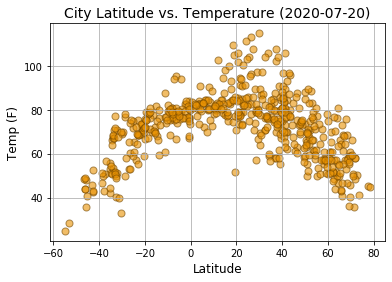

In [17]:
#I perfer to drop the alpha a bit. The overlay of the plots display a nice density.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Temp'],
            marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.title(f"City Latitude vs. Temperature ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_temp.png', bbox_inches='tight')
plt.show()


## Latitude vs. Humidity Plot

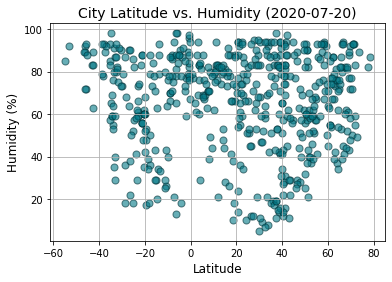

In [18]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'],
            marker="o", s=50, facecolors='#027886', edgecolors='#003036', alpha=0.6)
plt.title(f"City Latitude vs. Humidity ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_humidity.png', bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

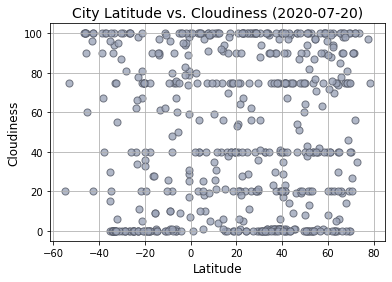

In [19]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'],
            marker="o", s=50, facecolors='#9DA5B9', edgecolors='#575C69', alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_clouds.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

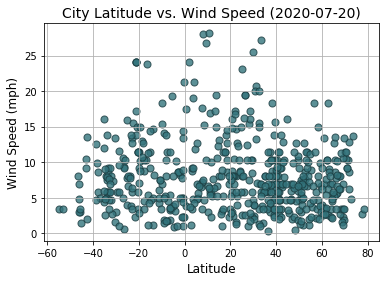

In [20]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'],
            marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.savefig('../images/lat_wind.png', bbox_inches='tight')
plt.show()

## Linear Regression Latitude vs. Temperature Plot

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

The correlation between Latitude 
and Temperature is -0.0


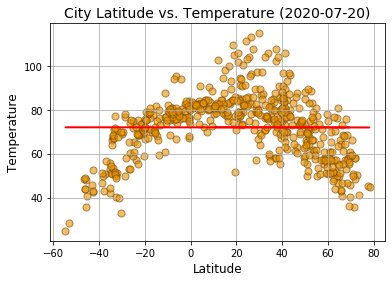

In [22]:
# Calculate the correlation coefficient and linear regression model 
lat_line = clean_city_data.iloc[:,2]
temp_lin = clean_city_data.iloc[:,4]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = clean_city_data['Latitude']
y_values = clean_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"City Latitude vs. Temperature ({date.today()})", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.grid(True)
#plt.tight_layout()
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The correlation between Latitude {nreturn}and Temperature is {round(correlation[0],2)}")

plt.savefig("../images/lat_temp_lin_regress.png", bbox_inches = 'tight', dpi=100)
plt.show()


# The City Latitude vs Temperature plot displays no standard linear regression. In this case the plot dipicts two distinct arc values in the plotted data. We would be best showing multi-regression lines on this plot for each hemisphere's latitude range.

# Create Northern and Southern Hemisphere DataFrames

In [23]:
#Southern Latitude Database creation
slat_city_data = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] >= 0].index, inplace = False)
len(slat_city_data)

168

In [24]:
# Extract relevant fields from the southern lat dataframe
slat_city_data.reset_index(drop=True, inplace=True)
slat_city_data

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,-33.65,115.33,51.71,91,94,9.22
1,Iquique,CL,-20.22,-70.14,59.00,62,75,3.36
2,Rikitea,PF,-23.12,-134.97,68.32,61,98,13.42
3,Ushuaia,AR,-54.80,-68.30,24.80,85,20,3.36
4,Pisco,PE,-13.70,-76.22,59.43,93,90,1.12
...,...,...,...,...,...,...,...,...
163,Tual,ID,-5.67,132.75,79.30,84,50,19.35
164,Porto Walter,BR,-8.27,-72.74,79.03,71,1,1.68
165,Bella Union,UY,-30.28,-57.60,70.02,73,100,13.33
166,Mercedes,AR,-34.65,-59.43,54.41,98,100,4.85


In [25]:
#Northern Latitude Database creation
nlat_city_data = clean_city_data.drop(clean_city_data[clean_city_data['Latitude'] <= 0].index, inplace = False)
len(nlat_city_data)

375

In [26]:
# Extract relevant fields from the northern lat dataframe
nlat_city_data.reset_index(drop=True, inplace=True)
nlat_city_data

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,Andenes,NO,69.31,16.12,59.00,77,75,2.24
1,Dukat,RU,62.55,155.55,48.63,79,0,2.55
2,Hilo,US,19.73,-155.09,70.70,73,90,3.36
3,Shache,CN,38.42,77.24,90.90,14,97,8.77
4,Vila,PT,42.03,-8.16,84.58,45,0,3.36
...,...,...,...,...,...,...,...,...
370,Solnechnyy,RU,50.72,136.63,69.22,85,100,1.66
371,Honningsvåg,NO,70.98,25.97,50.00,93,90,9.17
372,Paris,FR,48.85,2.35,75.52,49,20,12.75
373,Villaviciosa,ES,43.48,-5.44,77.00,58,0,7.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Temperature is -0.65


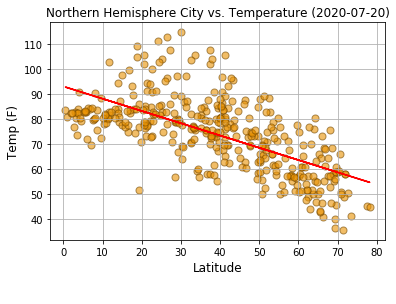

In [27]:
from scipy.stats import linregress
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
temp_lin = nlat_city_data.iloc[:,4]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Temperature ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#E99202', edgecolors="#754901", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Temperature is {round(correlation[0],2)}")

plt.savefig("../images/nhem_temp_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Temperature is 0.81


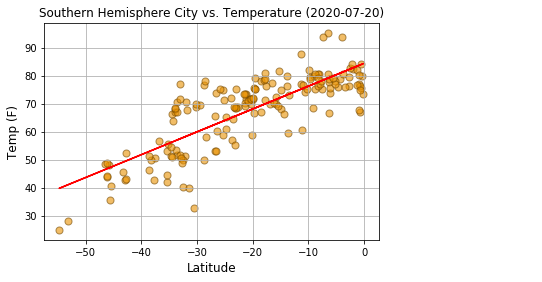

In [28]:
from scipy.stats import linregress
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
temp_lin = slat_city_data.iloc[:,4]
correlation = sts.pearsonr(lat_line,temp_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Temperature ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temp (F)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#E99202', edgecolors="#754901", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Temperature is {round(correlation[0],2)}")

plt.savefig("../images/shem_temp_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Humidity is 0.01


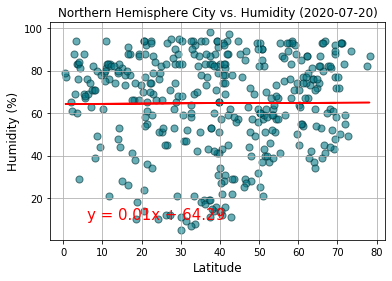

In [29]:
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
humidity_lin = nlat_city_data.iloc[:,5]
correlation = sts.pearsonr(lat_line,humidity_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Humidity ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#027886', edgecolors="#003036", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Humidity is {round(correlation[0],2)}")

plt.savefig("../images/nhem_humidity_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Humidity is -0.07


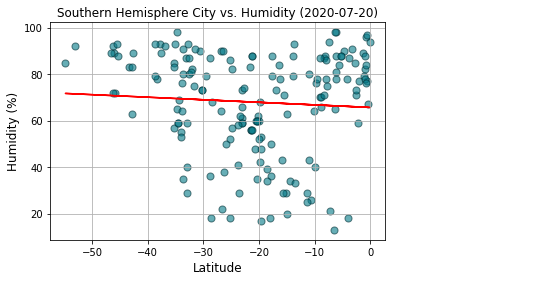

In [30]:
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
humidity_lin = slat_city_data.iloc[:,5]
correlation = sts.pearsonr(lat_line,humidity_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Humidity ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#027886', edgecolors="#003036", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Humidity is {round(correlation[0],2)}")

plt.savefig("../images/shem_humidity_lin_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Cloudiness is 0.03


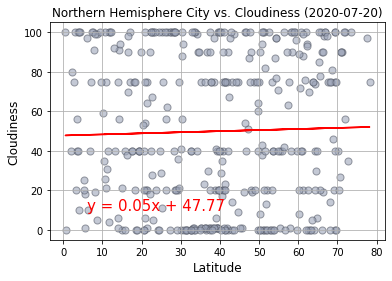

In [31]:
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
cloud_lin = nlat_city_data.iloc[:,6]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Cloudiness ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#9DA5B9', edgecolors="#575C69", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Cloudiness is {round(correlation[0],2)}")

plt.savefig("../images/nhem_cloudiness_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Cloudiness is -0.03


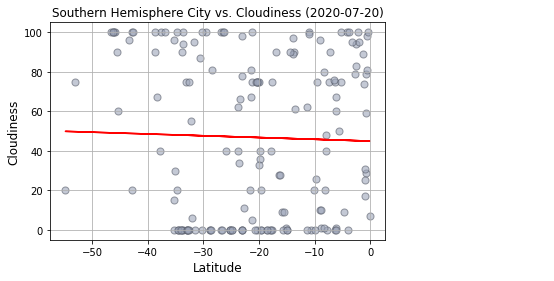

In [32]:
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
cloud_lin = slat_city_data.iloc[:,6]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Cloudiness ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#9DA5B9', edgecolors="#575C69", alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Cloudiness is {round(correlation[0],2)}")

plt.savefig("../images/shem_cloudiness_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between N. Hemisphere 
and Wind Speed is -0.21


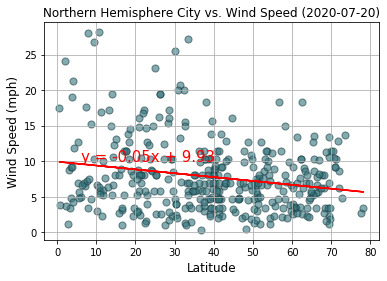

In [33]:
# Calculate the correlation coefficient and linear regression model 
lat_line = nlat_city_data.iloc[:,2]
cloud_lin = nlat_city_data.iloc[:,7]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = nlat_city_data['Latitude']
y_values = nlat_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Northern Hemisphere City vs. Wind Speed ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between N. Hemisphere {nreturn}and Wind Speed is {round(correlation[0],2)}")

plt.savefig("../images/nhem_wind_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between S. Hemisphere 
and Wind Speed is 0.03


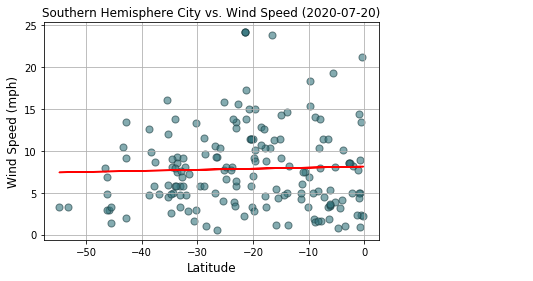

In [34]:
# Calculate the correlation coefficient and linear regression model 
lat_line = slat_city_data.iloc[:,2]
cloud_lin = slat_city_data.iloc[:,7]
correlation = sts.pearsonr(lat_line,cloud_lin)

#sets a variable for using '\n' in printed 'fstring'
nreturn = '\n'

x_values = slat_city_data['Latitude']
y_values = slat_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Southern Hemisphere City vs. Wind Speed ({date.today()})", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.grid(True)
plt.scatter(x_values,y_values, marker="o", s=50, facecolors='#33747C', edgecolors='#1B3C40', alpha=0.6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.tight_layout()
print(f"The correlation between S. Hemisphere {nreturn}and Wind Speed is {round(correlation[0],2)}")

plt.savefig("../images/shem_wind_regress.png", bbox_inches = 'tight', dpi=150)
plt.show()
